In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('D2.csv')
df.info()
df = df.replace('?', np.nan)

#Correct data type:
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)

#Fix missing data:
df['race'].fillna(df['race'].mode()[0], inplace=True)
df['age'].fillna(df['age'].mode()[0], inplace=True)
df['chlorpropamide'].fillna(df['chlorpropamide'].mode()[0], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      35335 non-null  object
 1   gender                    36183 non-null  object
 2   age                       36174 non-null  object
 3   admission_type_id         36183 non-null  int64 
 4   discharge_disposition_id  36183 non-null  int64 
 5   admission_source_id       36183 non-null  int64 
 6   time_in_hospital          36183 non-null  int64 
 7   medical_specialty         36183 non-null  object
 8   num_lab_procedures        36183 non-null  int64 
 9   num_procedures            36183 non-null  int64 
 10  num_medications           36183 non-null  int64 
 11  number_outpatient         36183 non-null  int64 
 12  number_emergency          36183 non-null  int64 
 13  number_inpatient          36183 non-null  int64 
 14  number_diagnoses      

In [ ]:
#Mapping age group into numeric
age_map = {'[0-10)': 1, '[10-20)': 2, '[20-30)': 3,'[30-40)': 4,'[40-50)': 5, '[50-60)': 6,'[60-70)': 7,'[70-80)': 8,'[80-90)': 9,'[90-100)': 10}
df['age'] = df['age'].map(age_map)

print(df['age'].value_counts())

8     8999
7     8232
9     6386
6     6159
5     3328
4     1245
10    1072
3      561
2      179
1       22
Name: age, dtype: int64


In [ ]:
#dataset after data cleaning:
print('=====> Dataset after pre-processing:\n')
df.info()

=====> Dataset after pre-processing:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      36183 non-null  object
 1   gender                    36183 non-null  object
 2   age                       36183 non-null  int64 
 3   admission_type_id         36183 non-null  object
 4   discharge_disposition_id  36183 non-null  object
 5   admission_source_id       36183 non-null  object
 6   time_in_hospital          36183 non-null  int64 
 7   medical_specialty         36183 non-null  object
 8   num_lab_procedures        36183 non-null  int64 
 9   num_procedures            36183 non-null  int64 
 10  num_medications           36183 non-null  int64 
 11  number_outpatient         36183 non-null  int64 
 12  number_emergency          36183 non-null  int64 
 13  number_inpatient          36183 non-nu

In [ ]:
#take the chosen variables and drop the rest
df2 = df[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'age']]

from sklearn.preprocessing import StandardScaler

X = df2.to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)

[[-0.04005438 -0.02931098 -0.41202168 -0.0913574 ]
 [ 1.37699536  0.21858747  1.16834223  1.18838892]
 [-0.74857925 -0.22762973 -0.8982875   1.18838892]
 ...
 [-0.74857925  0.11942809  0.07424413 -0.0913574 ]
 [ 0.31420806  1.60681875  0.68207641  1.18838892]
 [ 0.66847049 -1.51670164 -1.62768623  0.54851576]]


In [ ]:
print(X)

[[ 4 43  0 13  7]
 [ 8 48  6 26  9]
 [ 2 39  0  9  9]
 ...
 [ 2 46  6 17  7]
 [ 5 76  1 22  9]
 [ 6 13  3  3  8]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

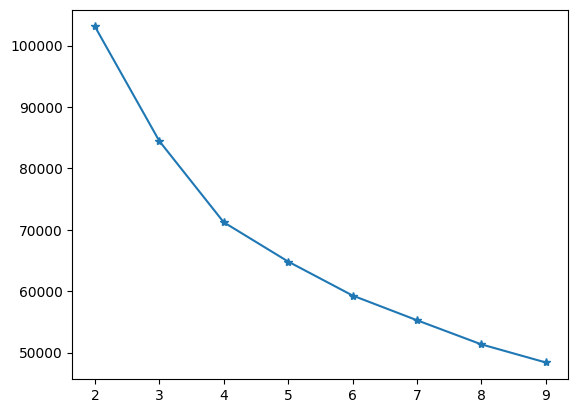

In [ ]:
from sklearn.cluster import KMeans

#find the number of cluster:
#Using Elbow method:
clusters = []
inertia_vals = []

rs = 42
for k in range(2,10,1):
  model = KMeans(n_clusters=k, random_state=rs)
  model.fit(X)

  clusters.append(model)
  inertia_vals.append(model.inertia_)

plt.plot(range(2,10,1), inertia_vals, marker='*')
plt.show()

In [ ]:
#find the number of cluster with Silhouette score
from sklearn.metrics import silhouette_score

print(clusters[1])
print('Silhouette score for k = 3', silhouette_score(X, clusters[1].predict(X)))
print(clusters[2])
print('Silhouette score for k = 4', silhouette_score(X, clusters[2].predict(X)))
print(clusters[3])
print('Silhouette score for k = 5', silhouette_score(X, clusters[3].predict(X)))


KMeans(n_clusters=3, random_state=42)
Silhouette score for k = 3 0.23616928907372062
KMeans(n_clusters=4, random_state=42)
Silhouette score for k = 4 0.23353454656835648
KMeans(n_clusters=5, random_state=42)
Silhouette score for k = 5 0.20617532855288506


In [ ]:
from sklearn.cluster import KMeans

rs = 42

model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid Location:")
for centroid in model.cluster_centers_:
    print(centroid)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sum of intra-cluster distance: 84450.3910917993
Centroid Location:
[-0.43045764 -0.28207142 -0.35370116  0.56432382]
[1.21119788 0.76069869 1.00334832 0.20510738]
[-0.44943437 -0.26078324 -0.37760117 -1.24427463]


Cluster membership
0    17228
1     9571
2     9384
Name: Cluster_ID, dtype: int64


<ipython-input-6-0fcf7fc0c4b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster_ID'] = y


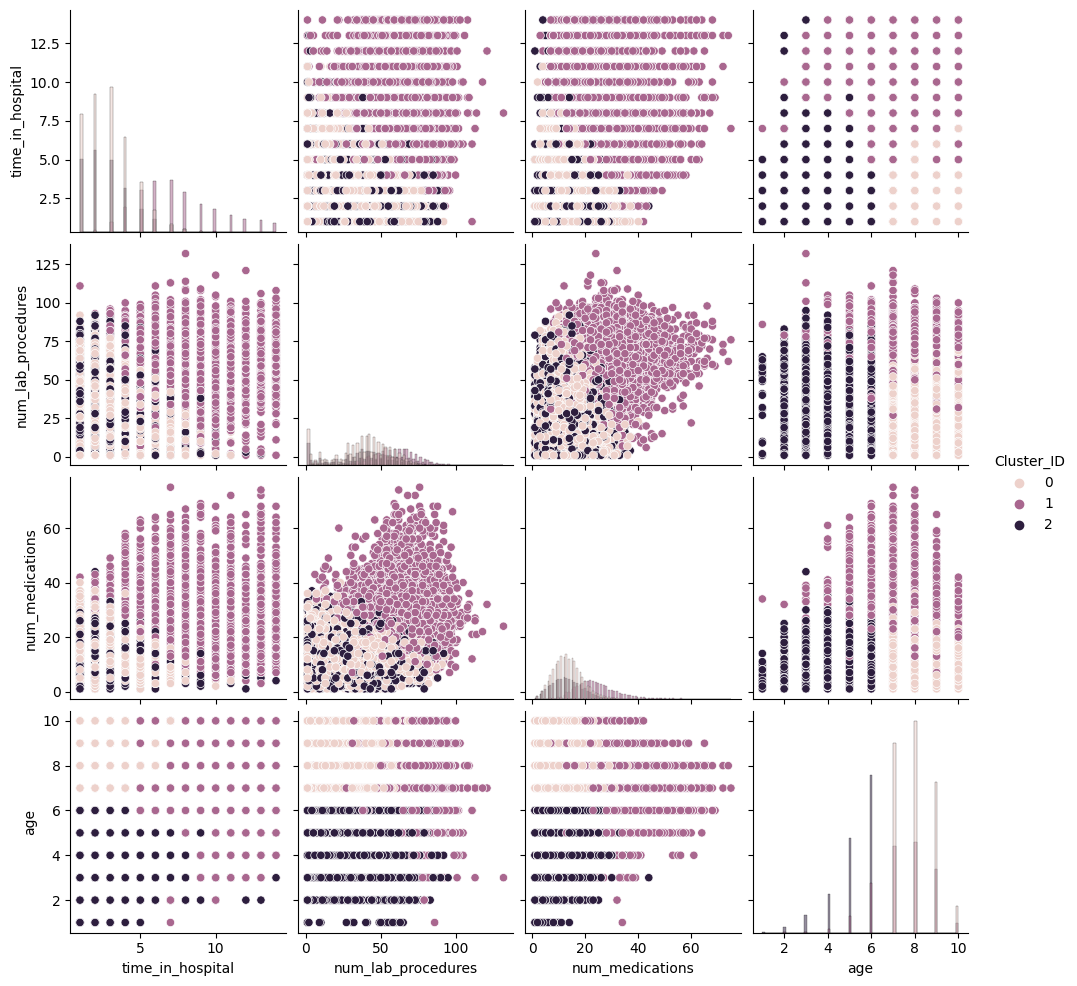

In [ ]:
y = model.predict(X)
df2['Cluster_ID'] = y

print('Cluster membership')
print(df2['Cluster_ID'].value_counts())

cluster_g = sns.pairplot(df2, hue='Cluster_ID', diag_kind='hist')

plt.show()

Distribution for cluster0


<ipython-input-7-7c398c4129a6>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins = bins, ax = ax[j], norm_hist = True)
<ipython-input-7-7c398c4129a6>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], bins = bins, ax = ax[j], hist = 

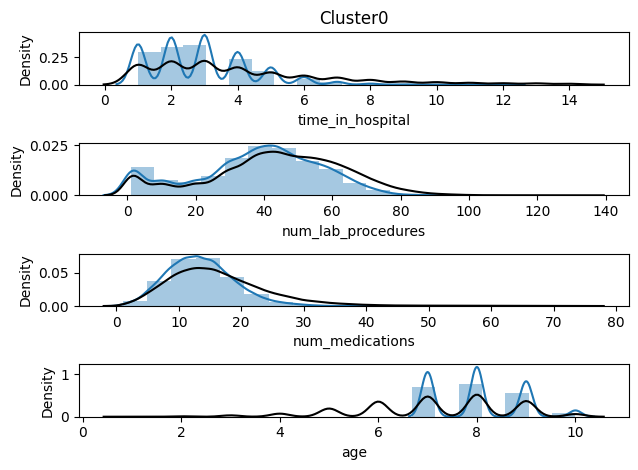

Distribution for cluster1


<ipython-input-7-7c398c4129a6>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins = bins, ax = ax[j], norm_hist = True)
<ipython-input-7-7c398c4129a6>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], bins = bins, ax = ax[j], hist = 

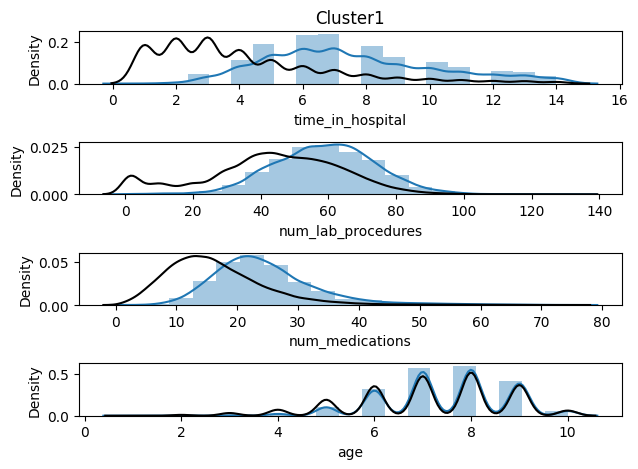

Distribution for cluster2


<ipython-input-7-7c398c4129a6>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins = bins, ax = ax[j], norm_hist = True)
<ipython-input-7-7c398c4129a6>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], bins = bins, ax = ax[j], hist = 

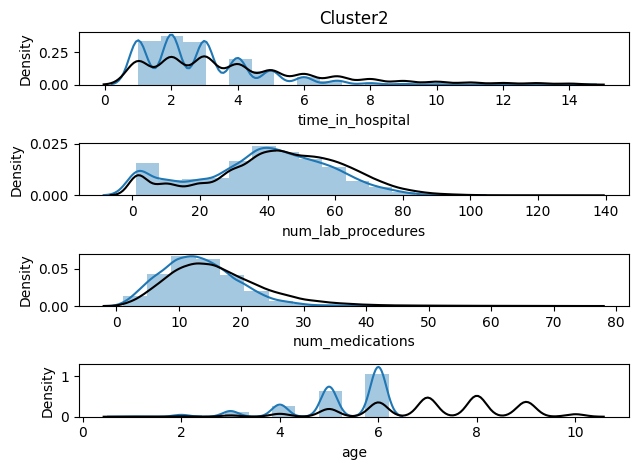

In [ ]:
#prepare column and bin size
cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'age']
n_bins=20


#inspecting 3 cluster
clusters_to_inspect = [0,1,2]

for cluster in clusters_to_inspect:
  print("Distribution for cluster{}".format(cluster))

  #create subplots
  fig, ax = plt.subplots(nrows=4)
  ax[0].set_title("Cluster{}".format(cluster))

  for j, col in enumerate(cols):
    # create the bins
    bins = np.linspace(min(df2[col]), max(df2[col]), n_bins)
    # plot distribution of the cluster using histogram
    sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins = bins, ax = ax[j], norm_hist = True)
    # plot the normal distribution with a black line
    sns.distplot(df2[col], bins = bins, ax = ax[j], hist = False, color = "k")
  plt.tight_layout()
  plt.show()

In [ ]:
#QUESTION 4

print(df['race'].unique())

['Caucasian' 'AfricanAmerican' 'Hispanic' 'Other' 'Asian']


In [ ]:
#mapping
race_map = {'Caucasian': 1, 'AfricanAmerican': 2, 'Hispanic': 3,'Asian': 4,'Other': 5}
df['race'] = df['race'].map(race_map)

In [ ]:
df3 = df[['race', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'age']]
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   race                36183 non-null  int64
 1   time_in_hospital    36183 non-null  int64
 2   num_lab_procedures  36183 non-null  int64
 3   num_medications     36183 non-null  int64
 4   age                 36183 non-null  int64
dtypes: int64(5)
memory usage: 1.4 MB
None


In [ ]:
from sklearn.preprocessing import StandardScaler

#convert df3 to matrix
Y = df3.to_numpy()

#scaling
scaler = StandardScaler()
Y = scaler.fit_transform(Y)

In [ ]:
pip install kmodes

<ipython-input-12-b6e788f93d78>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Cluster_ID'] = y


Cluster membership
0    17316
2     9484
1     9383
Name: Cluster_ID, dtype: int64


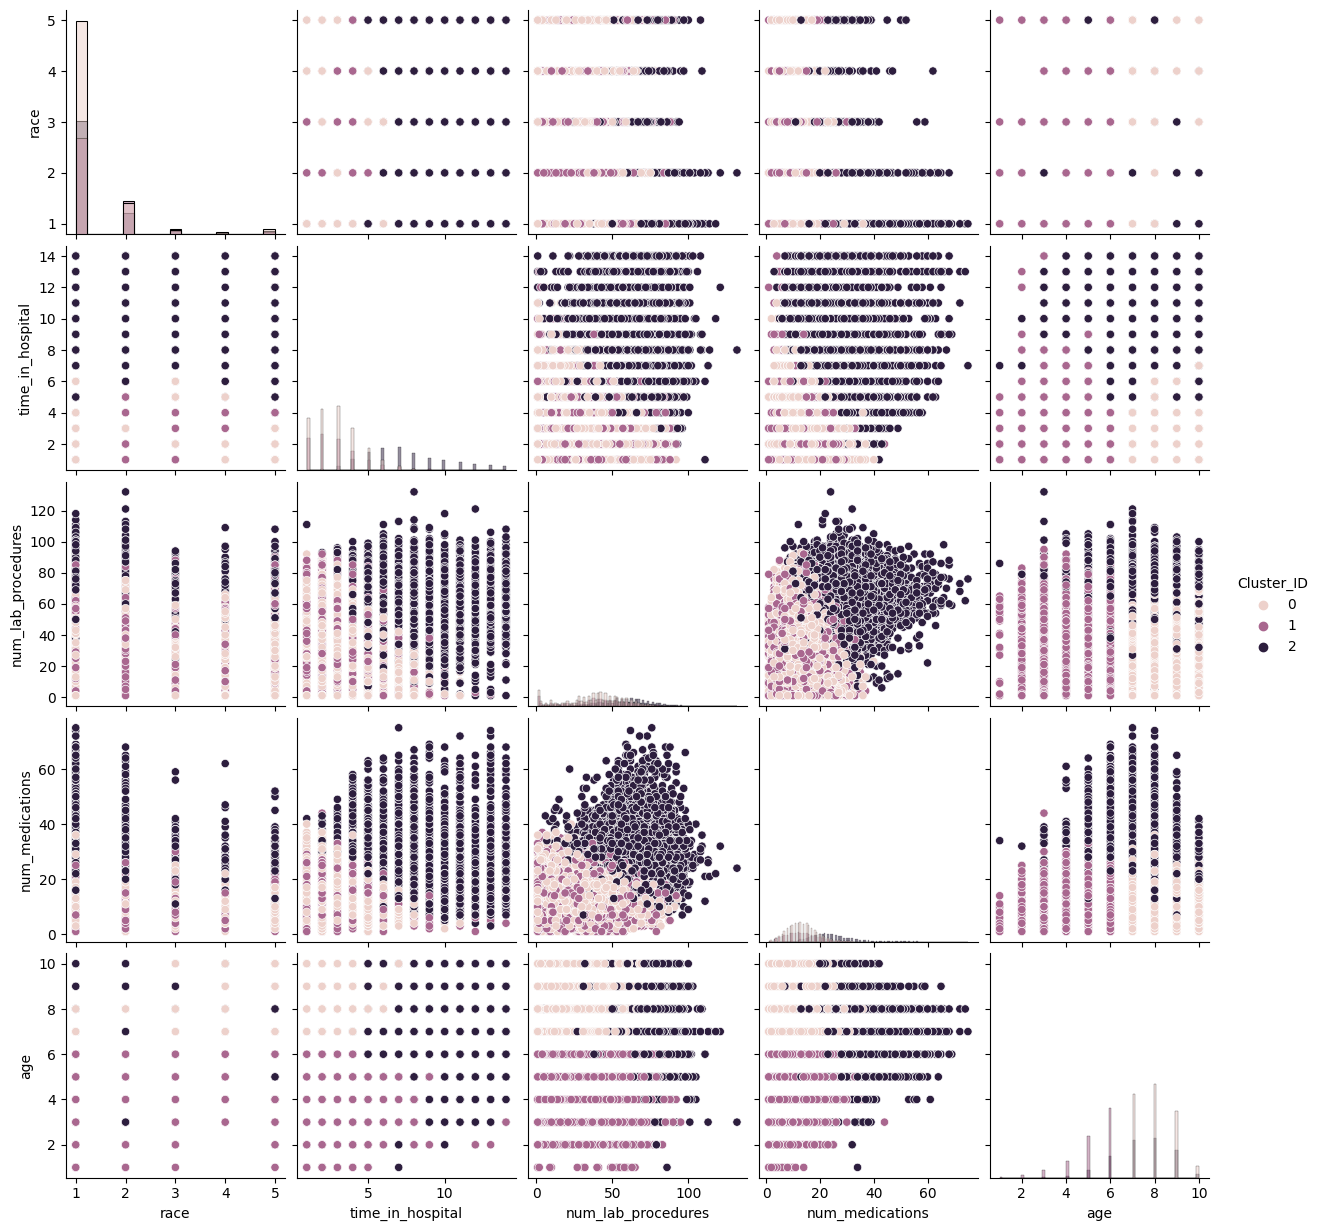

In [ ]:
from kmodes.kmodes import KModes
from kmodes.kprototypes  import KPrototypes
import seaborn as sns
import matplotlib.pyplot as plt

rs=42
model1 = KPrototypes(n_clusters=3, random_state=rs)
y=model1.fit_predict(Y, categorical = [0])
df3['Cluster_ID'] = y

#number of records in each cluster
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())

#pairplot the cluster distribution
cluster_g = sns.pairplot(df3, hue='Cluster_ID', diag_kind='hist')
plt.show()

Distribution for cluster 0


<ipython-input-18-bd843208b3ff>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[df3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
<ipython-input-18-bd843208b3ff>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[col], bins=bins, ax=ax[j], hist=False, col

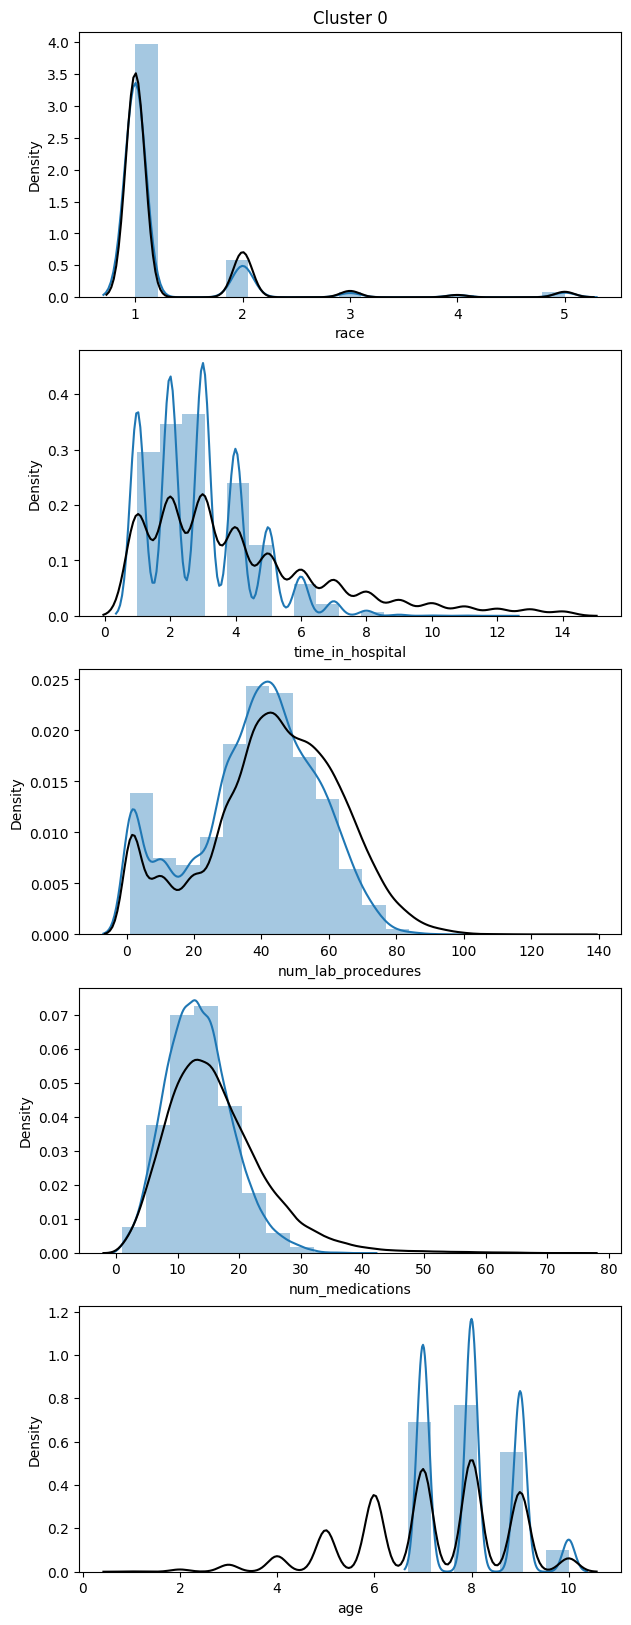

Distribution for cluster 1


<ipython-input-18-bd843208b3ff>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[df3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
<ipython-input-18-bd843208b3ff>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[col], bins=bins, ax=ax[j], hist=False, col

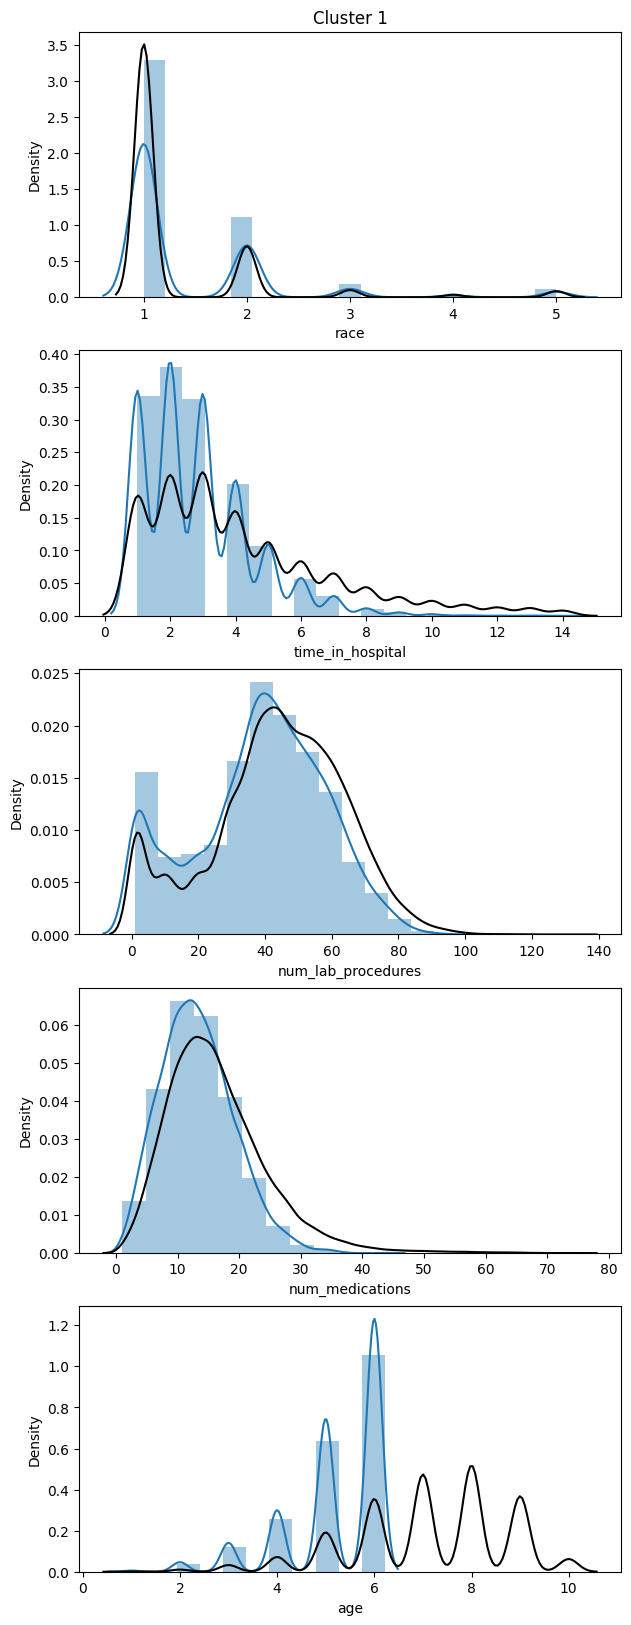

Distribution for cluster 2


<ipython-input-18-bd843208b3ff>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[df3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
<ipython-input-18-bd843208b3ff>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[col], bins=bins, ax=ax[j], hist=False, col

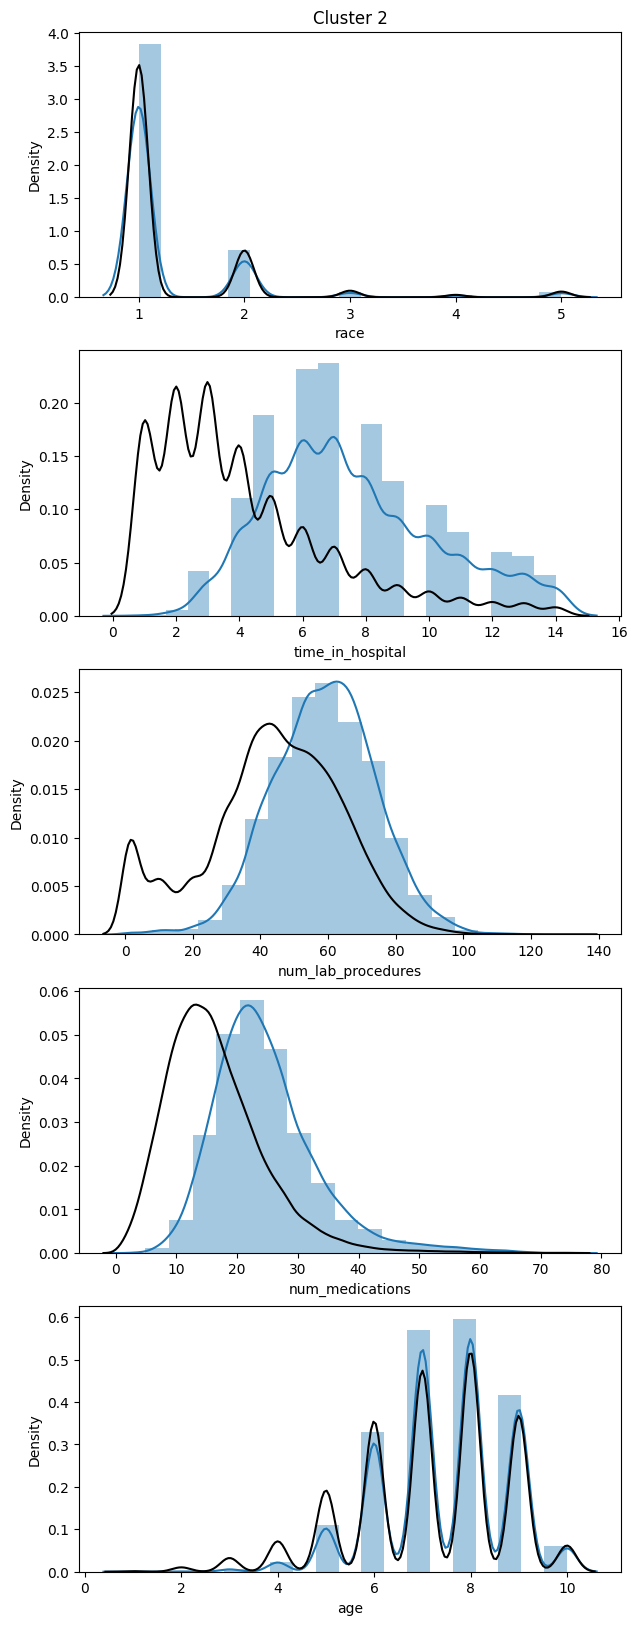

In [ ]:
#prepare the column and bin size
cols = ['race', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'age']
n_bins = 20

clusters_to_inspect = [0,1,2]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    fig, ax = plt.subplots(nrows=5, figsize=(7,20))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        bins = np.linspace(min(df3[col]), max(df3[col]), n_bins)
        sns.distplot(df3[df3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        sns.distplot(df3[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout
    plt.show()